# ZOMATO DATA ANALYSIS

In [60]:
# numpy is used for numerical operations
# pandas is used for data manipulation and analysis
# matplotlib.pyplot and seaborn are used for data visualisation 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Zomato_data.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [6]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [7]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [9]:
def ratings(value):
    value = value[0:3]
    return float(value)

# OR 
# def ratings(value):
#     value = str(value).split("/")
#     value = value[0]
#     return float(value)

df["rate"] = df["rate"].map(ratings)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


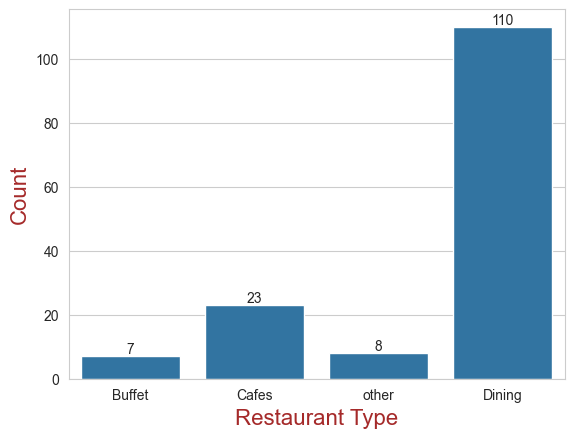

In [10]:
sns.set_style(style = "whitegrid")
ax = sns.countplot(data = df, x= "listed_in(type)")
ax.bar_label(ax.containers[0])
plt.xlabel("Restaurant Type",fontsize = 16,color = "brown")
plt.ylabel("Count",fontsize = 16,color = "brown")
plt.show()

##### From the above data we analysed that majority of customers order from dining category restaurant.

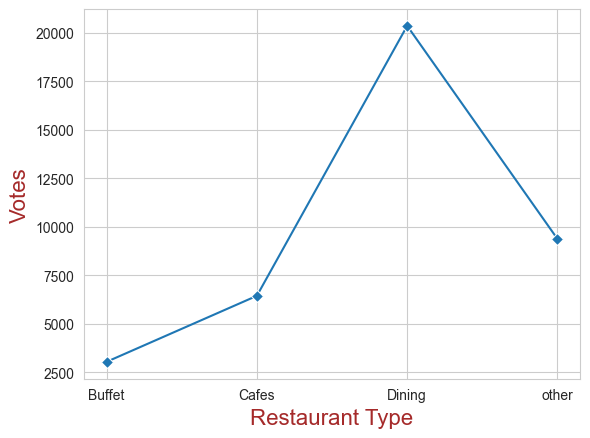

In [11]:
gp_vote = df.groupby("listed_in(type)").agg({"votes" : "sum"})

sns.lineplot(data = gp_vote,x = "listed_in(type)", y = "votes",marker = "D")
plt.xlabel("Restaurant Type",fontsize = 16,color = "brown")
plt.ylabel("Votes",fontsize = 16,color = "brown")
plt.show()

##### From the above data we analysed that dining cateogory restaurant has more votes.

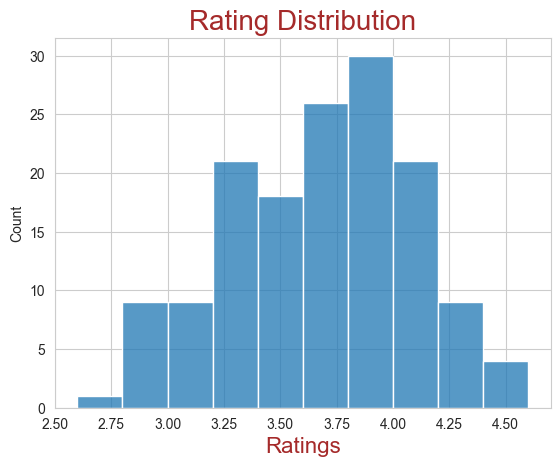

In [12]:
sns.histplot(data = df,x = "rate" , bins = 10 ) 
plt.title("Rating Distribution",fontsize = 20,color = "brown")
plt.xlabel("Ratings",fontsize = 16,color = "brown")
plt.show()

##### Conclusion - The majority restaurant have recieved ratings from 3.5 - 4

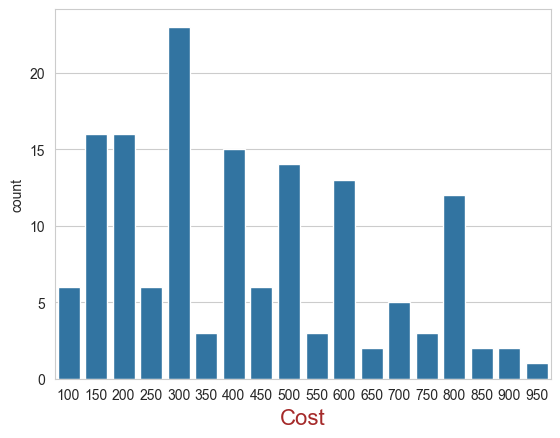

In [13]:
# Average order spending by couples
 
sns.countplot(data = df , x = "approx_cost(for two people)")
plt.xlabel("Cost",fontsize = 16,color = "brown")
plt.show()

##### Conclusion - The majority of couples prefer restaurant with an approx. cost of 300 rupees

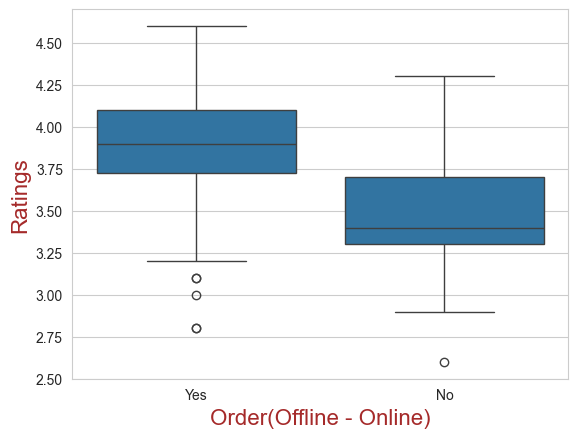

In [14]:
# which mode recieves the maximum ratings
sns.boxplot(data = df , x = "online_order" , y = "rate" )
plt.xlabel("Order(Offline - Online)",fontsize = 16,color = "brown")
plt.ylabel("Ratings",fontsize = 16,color = "brown")
plt.show()

##### Conclusion - offline orders recieves low ratings as compared to the online orders.
##### offline orders recieves low rating from 3.3 to 3.6
##### Online orders recieves high ratings from 3.6 to 4.1

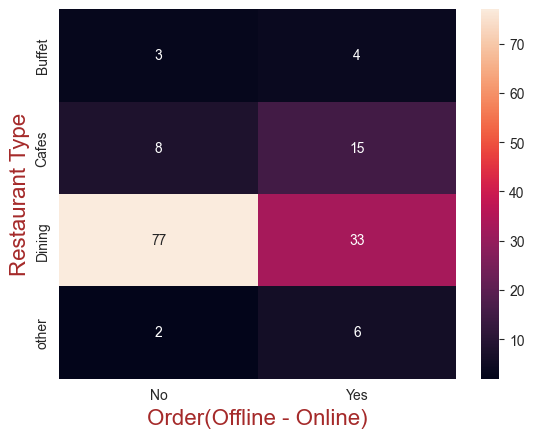

In [24]:
pivot_table = df.pivot_table(index = "listed_in(type)" , 
                             columns = "online_order", aggfunc = "size", fill_value = 0)

sns.heatmap(data = pivot_table , annot = True , fmt = "d")
plt.xlabel("Order(Offline - Online)",fontsize = 16,color = "brown")
plt.ylabel("Restaurant Type",fontsize = 16,color = "brown")
plt.show()

##### Conclusion - 
##### Dining restaurants primarily accepts offline orders ,whereas cafes recieves online orders
##### this suggests that clients preffers to orders in person at restaurants but prefer online ordering at cafes.